# bulbea
> Deep Learning based Python Library for Stock Market Prediction and Modelling

![](bulbea.png)

A canonical way of importing the `bulbea` module is as follows:

In [1]:
import bulbea as bb

### `bulbea.Share`

In order to analyse a desired share, we use the `Share` object defined under `bulbea` which considers 2 arguments - *the **source code** for the economic data* and *the **ticker symbol** for a said company*.

In [2]:
from coinmarketcap_draw import coinmarketcap_data

Go ahead and create a `Share` object as follows:

In [3]:
coin_name = 'raiden-network-token'
data = coinmarketcap_data(coin_name)

In [4]:
nsamples = 10
data.tail(nsamples)

,market_cap,price_btc,price_usd,volume_usd,volume_token,Close
2017-12-05 15:04:00,174816181.0,0.000295,3.48594,16081500.0,4.613246e+06,3.48594
2017-12-05 15:19:00,175053887.0,0.000295,3.49068,16088500.0,4.608987e+06,3.49068
2017-12-05 15:34:00,176684229.0,0.000298,3.52319,16482600.0,4.678317e+06,3.52319
2017-12-05 15:49:00,171477265.0,0.000289,3.41936,16038900.0,4.690615e+06,3.41936
2017-12-05 16:04:00,166469393.0,0.000280,3.31950,15663000.0,4.718482e+06,3.31950
2017-12-05 16:19:00,164622909.0,0.000280,3.28268,15577800.0,4.745452e+06,3.28268
2017-12-05 16:34:00,163728252.0,0.000279,3.26484,15527000.0,4.755823e+06,3.26484
2017-12-05 16:49:00,160913392.0,0.000275,3.20871,15237200.0,4.748700e+06,3.20871
2017-12-05 17:04:00,161143074.0,0.000276,3.21329,15240300.0,4.742896e+06,3.21329
2017-12-05 17:14:00,163315024.0,0.000280,3.25660,15379600.0,4.722594e+06,3.25660


In order to analyse a given attribute, you could plot the same as follows:

##  Convert the data to hourly

In [26]:
from datetime import timedelta
import pandas as pd

def convert_with_n_hour_gap(data,n):
    times = data.index.copy()
    first_time = times[0].to_datetime()
    v_dict = dict()
    
    for x in range(1,len(times)):
        t = times[x].to_datetime()
        if n == 24:
            success = t.day == first_time.day + 1
        else:
            success = (first_time + timedelta(hours=n)).hour == t.hour
        if success:
            first_time = t
            index = pd.Timestamp(t)
            v_dict[index] = data.loc[index]['Close']
    df = pd.DataFrame(list(v_dict.items()), columns=['Date', 'Close'])
    df.set_index("Date",inplace=True)
    return df

In [28]:
share_array = []
for i in range(1,25):
    df = convert_with_n_hour_gap(data,i)
    share = bb.Share("123",'123',data=df)
    share_array.append(share)

/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/entity/share.py:174: UserWarning: Environment variable BULBEA_QUANDL_API_KEY for Quandl hasn't been set. A maximum of 50000 calls per day can be made. Visit https://www.quandl.com to get your API key.
  warnings.warn(message)


## visualize the 24 hour data

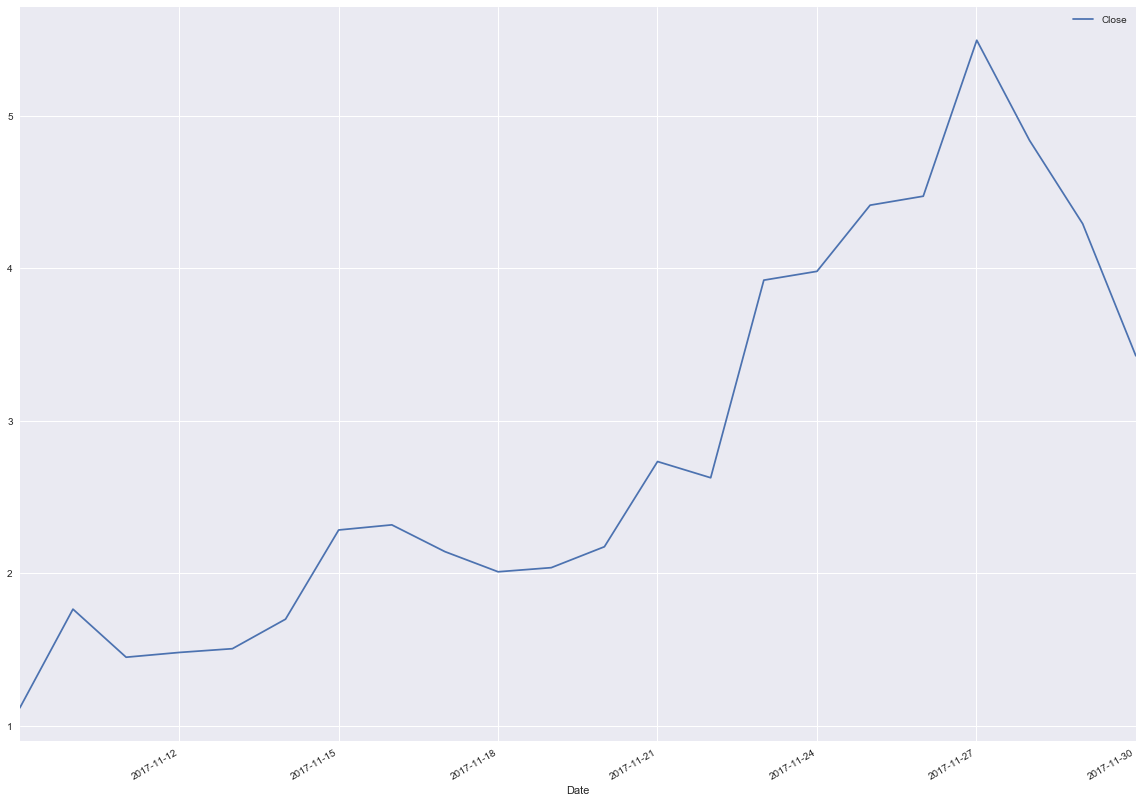

In [29]:
% matplotlib inline
share_array[-1].plot(['Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

## visualize the 1 hour data

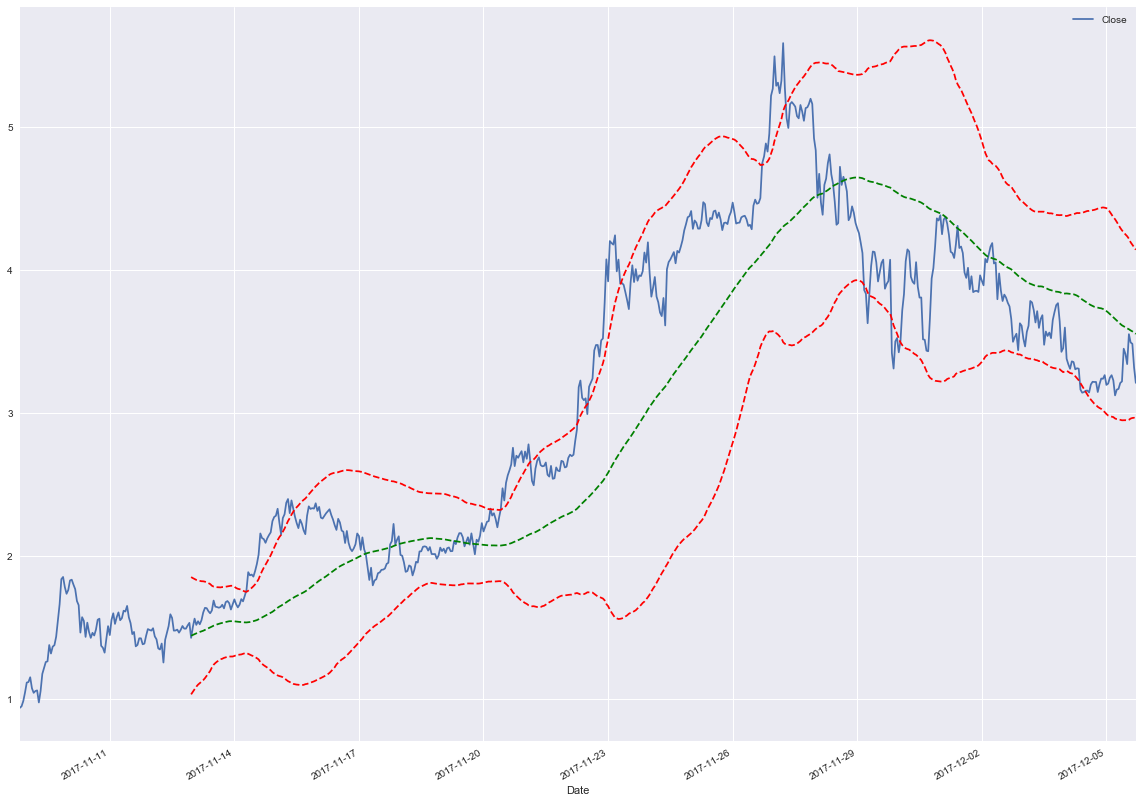

In [30]:
% matplotlib inline
share_array[0].plot(['Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

### Modelling

In [31]:
from bulbea.learn.models import RNN

### Training & Testing

In [32]:
from bulbea.learn.evaluation import split
import numpy as np

In [33]:
rnn_arr = []
for index,share in enumerate(share_array):
    print("{} hour. {}".format(index+1,len(share.data)))
    Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True, train=0.1)
    Xtrain  = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
    Xtest  = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))
    
    # Training
    rnn = RNN([1, 100, 100, 1]) # number of neurons in each layer
    rnn.fit(Xtrain, ytrain)
    rnn_arr.append(rnn)
    

1 hour. 646
window:8 splits.shape:(638, 8)


/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/learn/models/ann.py:29: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  return_sequences = True
/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/learn/models/ann.py:29: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=100)`
  return_sequences = True
/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/learn/models/ann.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  self.model.add(core.Dense(output_dim = sizes[-1]))


Epoch 1/10
64/64 [==============================] - 4s - loss: 0.0220     
Epoch 2/10
64/64 [==============================] - 0s - loss: 0.0176     
Epoch 3/10
64/64 [==============================] - 0s - loss: 0.0149     
Epoch 4/10
64/64 [==============================] - 0s - loss: 0.0113     
Epoch 5/10
64/64 [==============================] - 0s - loss: 0.0097     
Epoch 6/10
64/64 [==============================] - 0s - loss: 0.0127     
Epoch 7/10
64/64 [==============================] - 0s - loss: 0.0113     
Epoch 8/10
64/64 [================

#### TESTING

1 hour. 646
window:8 splits.shape:(638, 8)
0.0817459318366
window:8 splits.shape:(638, 8)


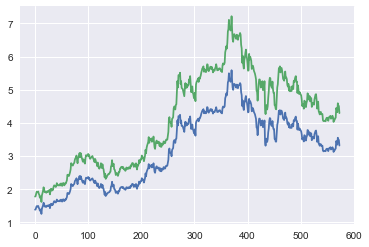

2 hour. 323
window:5 splits.shape:(318, 5)
0.0440624878894
window:5 splits.shape:(318, 5)


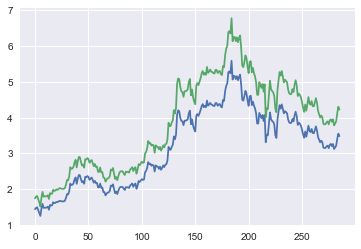

3 hour. 215
window:4 splits.shape:(211, 4)
0.0301098049884
window:4 splits.shape:(211, 4)


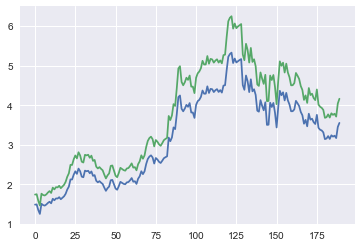

4 hour. 161
window:4 splits.shape:(157, 4)
0.0308700098529
window:4 splits.shape:(157, 4)


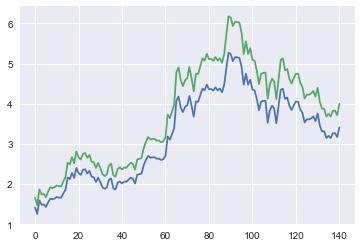

5 hour. 129
window:3 splits.shape:(126, 3)
0.0196220345742
window:3 splits.shape:(126, 3)


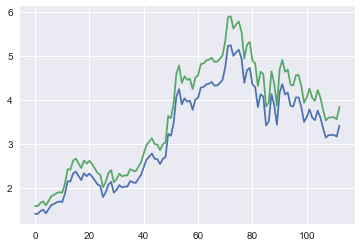

6 hour. 107
window:3 splits.shape:(104, 3)
0.0188004543344
window:3 splits.shape:(104, 3)


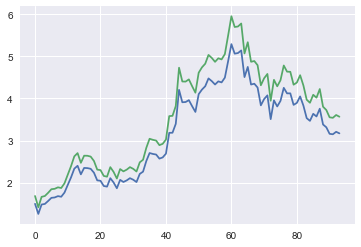

7 hour. 92
window:3 splits.shape:(89, 3)
0.0208369454019
window:3 splits.shape:(89, 3)


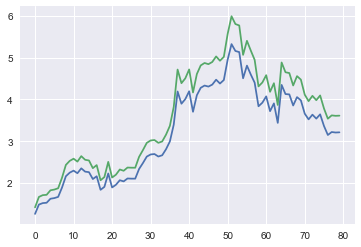

8 hour. 80
window:3 splits.shape:(77, 3)
0.0195194347103
window:3 splits.shape:(77, 3)


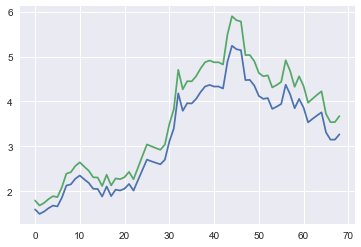

9 hour. 71
window:3 splits.shape:(68, 3)
0.0196742592537
window:3 splits.shape:(68, 3)


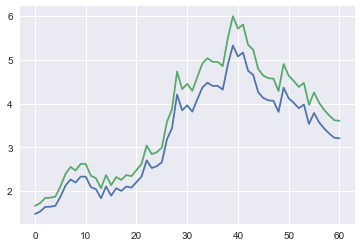

10 hour. 64
window:3 splits.shape:(61, 3)
0.0247173497802
window:3 splits.shape:(61, 3)


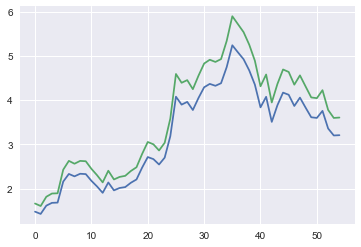

11 hour. 58
window:3 splits.shape:(55, 3)
0.0254316424474
window:3 splits.shape:(55, 3)


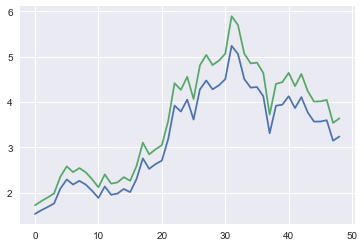

12 hour. 53
window:3 splits.shape:(50, 3)
0.0250730607305
window:3 splits.shape:(50, 3)


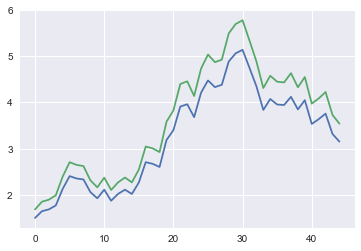

13 hour. 49
window:2 splits.shape:(47, 2)
0.0115192829625
window:2 splits.shape:(47, 2)


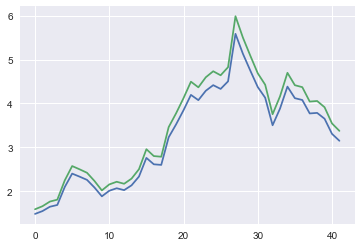

14 hour. 46
window:2 splits.shape:(44, 2)
0.0118486393056
window:2 splits.shape:(44, 2)


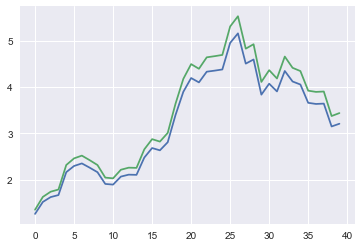

15 hour. 43
window:2 splits.shape:(41, 2)
0.0141038545172
window:2 splits.shape:(41, 2)


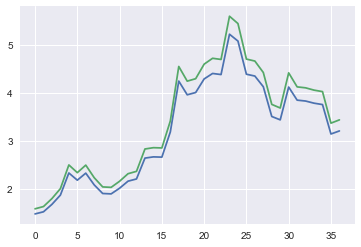

16 hour. 40
window:2 splits.shape:(38, 2)
0.0109026637425
window:2 splits.shape:(38, 2)


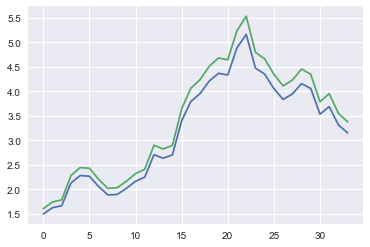

17 hour. 38
window:2 splits.shape:(36, 2)
0.0176115527188
window:2 splits.shape:(36, 2)


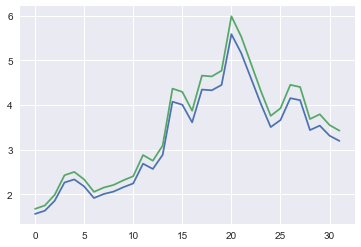

18 hour. 35
window:2 splits.shape:(33, 2)
0.0134707440707
window:2 splits.shape:(33, 2)


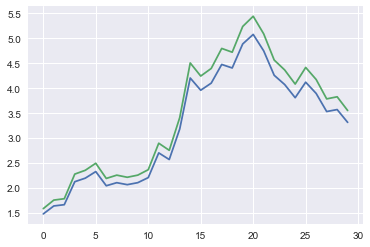

19 hour. 34
window:2 splits.shape:(32, 2)
0.017389815468
window:2 splits.shape:(32, 2)


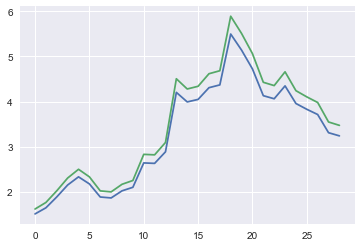

20 hour. 32
window:2 splits.shape:(30, 2)
0.0195798867269
window:2 splits.shape:(30, 2)


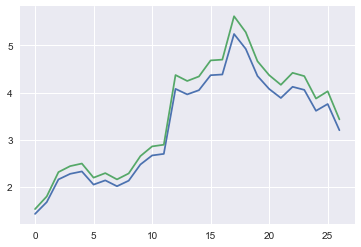

21 hour. 30
window:2 splits.shape:(28, 2)
0.0183618173361
window:2 splits.shape:(28, 2)


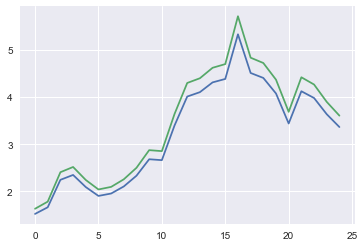

22 hour. 29
window:2 splits.shape:(27, 2)
0.0230749846546
window:2 splits.shape:(27, 2)


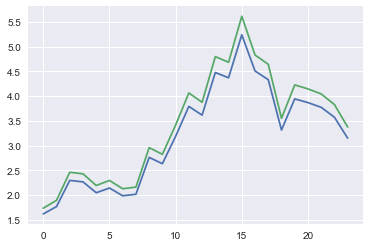

23 hour. 28
window:2 splits.shape:(26, 2)
0.0259600353605
window:2 splits.shape:(26, 2)


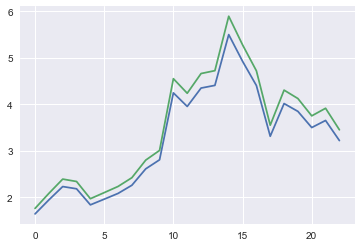

24 hour. 22
window:2 splits.shape:(20, 2)
0.025411299146
window:2 splits.shape:(20, 2)


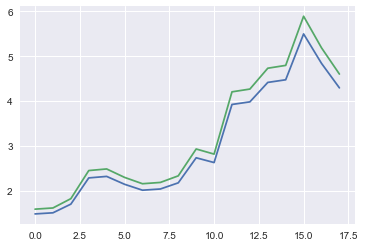

In [45]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as pplt
from bulbea.entity.share import _reverse_cummulative_return

for index,share in enumerate(share_array):
    print("{} hour. {}".format(index+1,len(share.data)))
    Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True, train=0.1)
    Xtrain  = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
    Xtest  = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

    predicted = rnn.predict(Xtest)
    sqr_err = mean_squared_error(ytest, predicted)
    print(sqr_err)
    
    
    _,_,_,ori_ytest = split(share, 'Close', normalize = False, train=0.1)

    new_pre = []
    for x in range(0,len(ori_ytest)):
        t = ori_ytest[x]
        predict = predicted[x]
        new_pre.append(_reverse_cummulative_return(t,predict))

    pplt.plot(ori_ytest)
    pplt.plot(new_pre)
    pplt.show()

    

In [44]:
from datetime import datetime
rnn.model.save("models/{}_{}_{}.h5".format(coin_name,sqr_err,datetime.utcnow().strftime('%Y_%b_%d_%H_%M')))